# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the libraries. <br>
2. **Data Cleaning:** <br>
 - Deleting redundant columns.
 - Renaming the columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - #Some Transformations
3. **Regression Analysis**
 - Linear Regression
 - Decision Tree Regression
 - Random Forest Regression
4. **Data Visualization:** Using plots to find relations between the features.
 - Restaurants delivering Online or not
 - Restaurants allowing table booking or not
 - Table booking Rate vs Rate
 - Best Location
 - Relation between Location and Rating
 - Restaurant Type
 - Gaussian Rest type and Rating
 - Types of Services
 - Relation between Type and Rating
 - Cost of Restuarant
 - No. of restaurants in a Location
 - Restaurant type
 - Most famous restaurant chains in Bengaluru 

#### The basic idea is analyzing the <font color=blue>Buisness Problem of Zomato </font> to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant and many more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Drop URL, Dish Liked,  Phone

In [5]:
df.drop(['url','dish_liked', 'phone'], inplace = True, axis =1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  menu_item                    51717 non-null  object
 12  listed_in(type)              51717 non-null  object
 13  listed_in(city)              51

### Drop duplicates

In [7]:
df.duplicated().sum()

43

##### There are 43 duplicate entries

In [8]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   cuisines                     51629 non-null  object
 9   approx_cost(for two people)  51329 non-null  object
 10  reviews_list                 51674 non-null  object
 11  menu_item                    51674 non-null  object
 12  listed_in(type)              51674 non-null  object
 13  listed_in(city)              51

### Drop Null values

In [9]:
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [11]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
x = {'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'listed_in(city)': 'city' }

df.rename(x,axis = 1, inplace = True)

### Performing some transformations

In [13]:
df['cost'] = df['cost'].apply(lambda x: x.replace(',',''))
df['cost'] = df['cost'].astype(float)

In [14]:
df['cost'].dtype

dtype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [16]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
df = df.loc[df.rate != 'NEW']
df = df.loc[df.rate != '-'].reset_index(drop = True)
df['rate'] = df.rate.apply(lambda x: x.replace('/5',''))
df['rate'] = df['rate'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  object 
 3   book_table    41237 non-null  object 
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  float64
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.4+ MB


In [20]:
df.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

In [21]:
def encode(df):
    for column in df.columns[~df.columns.isin(['votes','cost','rate'])]:
        df[column] = df[column].factorize()[0]
    return df

In [22]:
df1 = encode(df.copy())
df1

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,3137,2705,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
41233,8791,1718,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
41234,8725,6561,1,1,3.6,27,25,17,240,1500.0,20956,0,6,29
41235,8786,6598,1,0,4.3,236,56,17,237,2500.0,21054,0,6,29


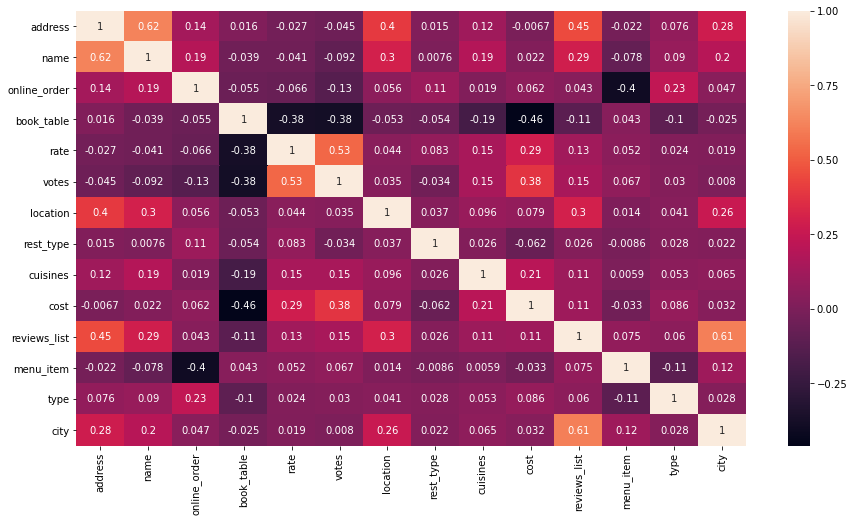

In [23]:
corr = df1.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

### We see large correlation between address and name which does not matter to us.

### Regression Analysis

### Splitting the dataset

In [24]:
df1

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,3137,2705,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
41233,8791,1718,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
41234,8725,6561,1,1,3.6,27,25,17,240,1500.0,20956,0,6,29
41235,8786,6598,1,0,4.3,236,56,17,237,2500.0,21054,0,6,29


In [25]:
X = df1.iloc[:,[2,3,5,6,7,8,9,11]]
y = df1['rate']
X.head(), y.head()

(   online_order  book_table  votes  location  rest_type  cuisines   cost  \
 0             0           0    775         0          0         0  800.0   
 1             0           1    787         0          0         1  800.0   
 2             0           1    918         0          1         2  800.0   
 3             1           1     88         0          2         3  300.0   
 4             1           1    166         1          0         4  600.0   
 
    menu_item  
 0          0  
 1          0  
 2          0  
 3          0  
 4          0  , 0    4.1
 1    4.1
 2    3.8
 3    3.7
 4    3.8
 Name: rate, dtype: float64)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 353)
X_train.head(), y_train.head()

(       online_order  book_table  votes  location  rest_type  cuisines    cost  \
 16950             0           1      0         8          2         5   250.0   
 767               0           1    131         8          4       278   400.0   
 6750              0           1    137        45          2      1295   250.0   
 9471              0           1     74        16          0       537  1000.0   
 25162             0           1     61        12          2      1860   350.0   
 
        menu_item  
 16950          0  
 767          190  
 6750           0  
 9471           0  
 25162          0  , 16950    3.9
 767      3.7
 6750     4.0
 9471     3.8
 25162    3.7
 Name: rate, dtype: float64)

# Data Visualization

##### Restraunts delivering online or not

Text(0.5, 1.0, 'Restaurants delivering online or Not')

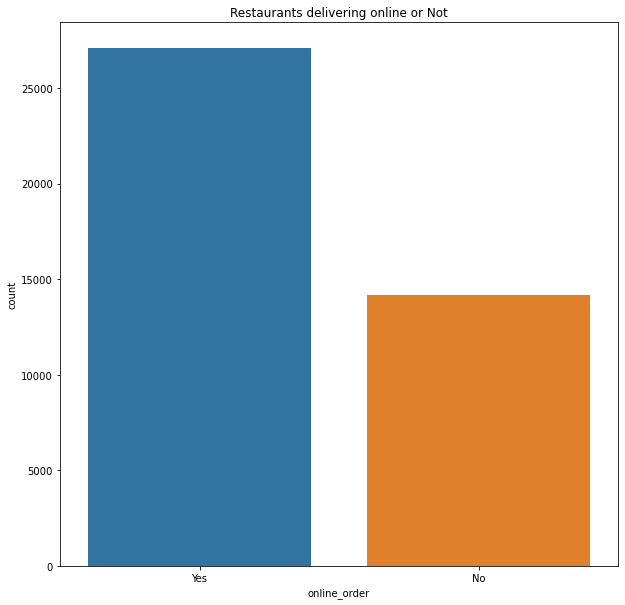

In [27]:
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

##### Restraunts allowing table booking or not

Text(0.5, 1.0, 'Restraunts allowing table booking or not')

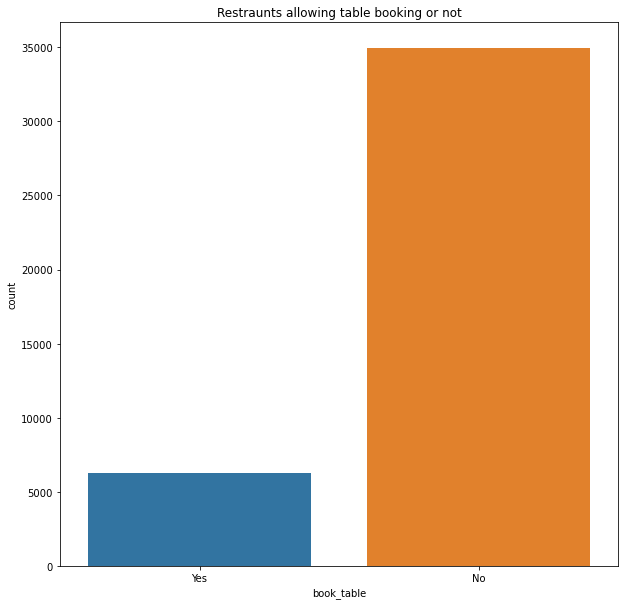

In [28]:
sns.countplot(df['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restraunts allowing table booking or not')

### Table booking rate vs normal rate

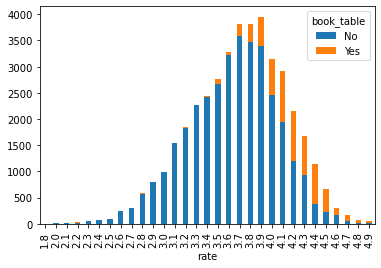

In [29]:
Y = pd.crosstab(df['rate'], df['book_table'])
Y.plot(kind = 'bar', stacked = True)

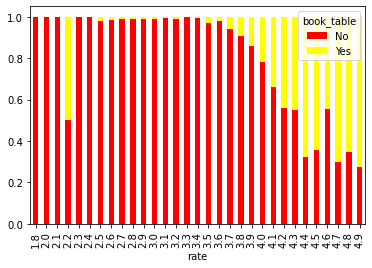

In [30]:
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])

Text(0.5, 1.0, 'Location wise count for restaurants')

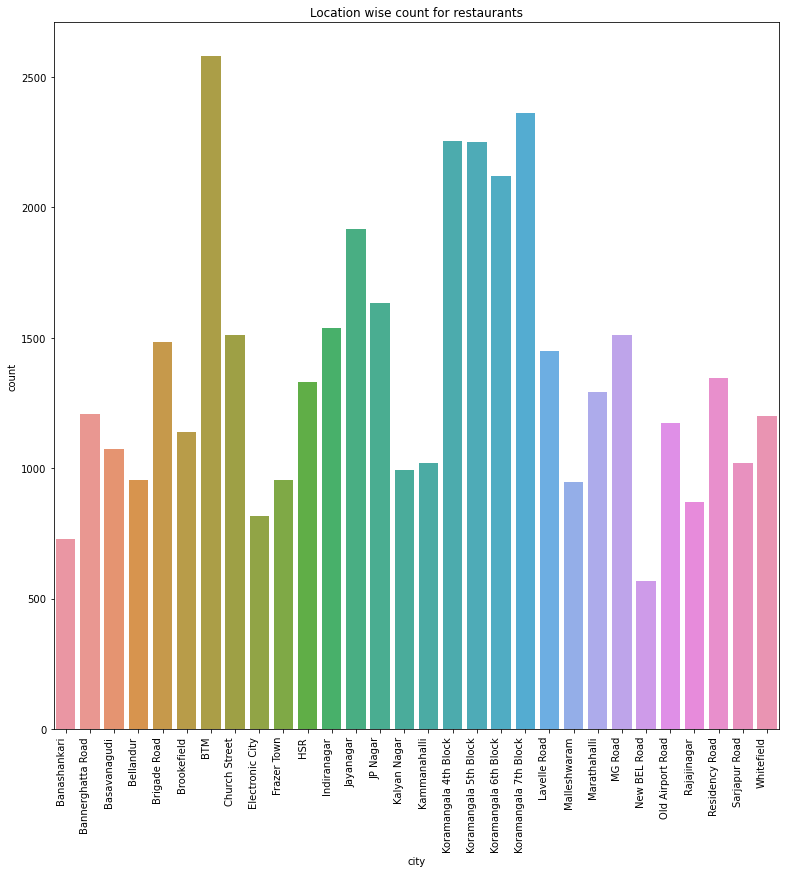

In [31]:
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

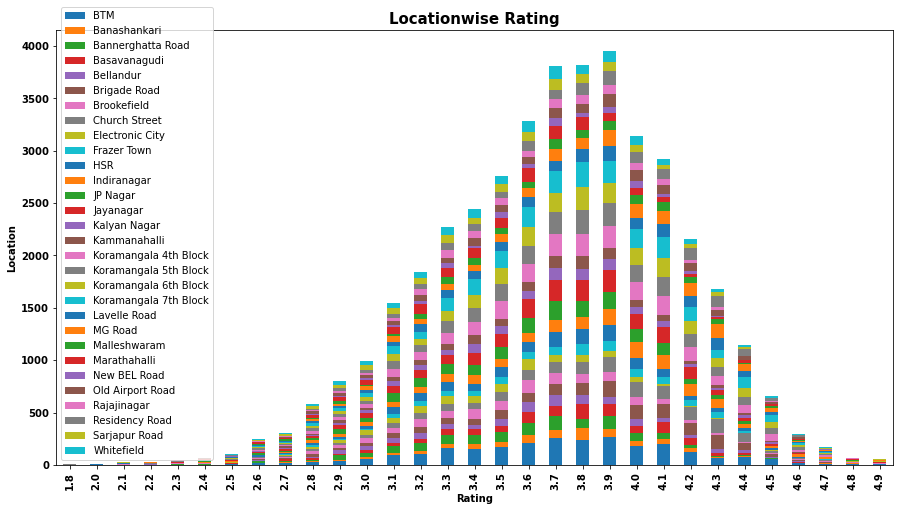

In [32]:
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True, figsize = (15,8))
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend()


##### Restaurant type

Text(0.5, 1.0, 'Restuarant Type')

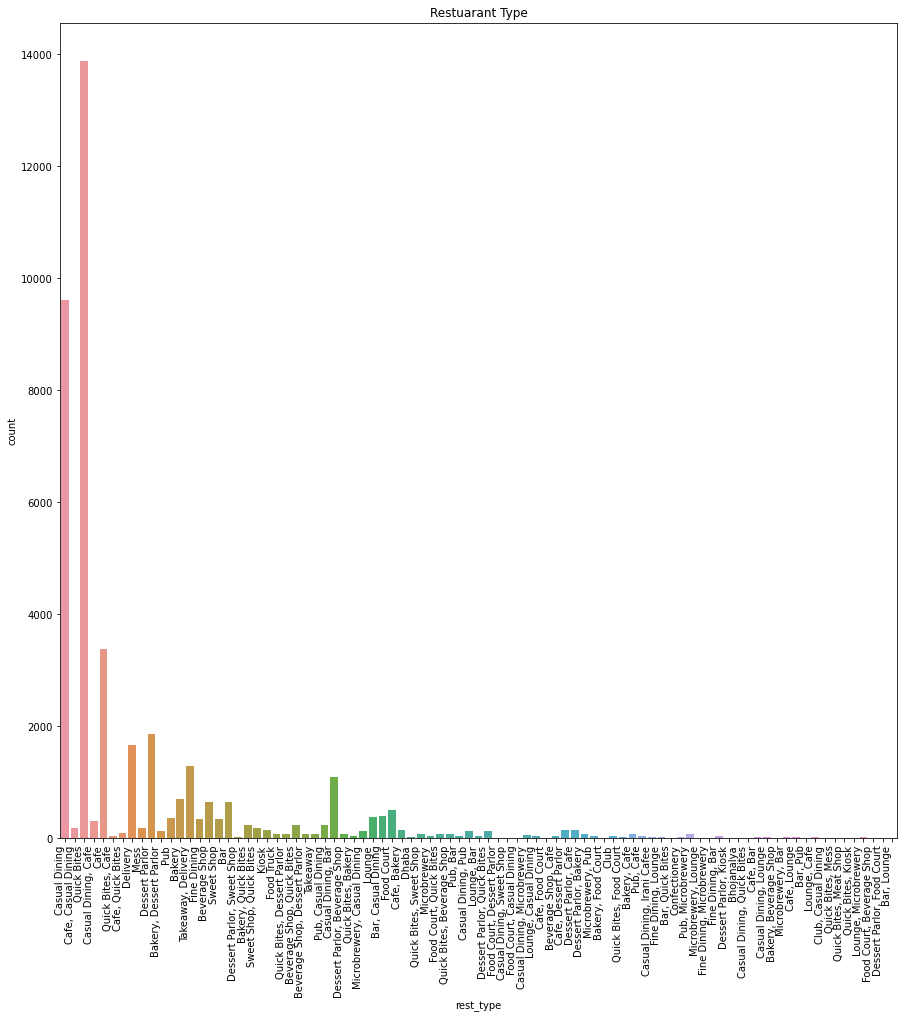

In [33]:
sns.countplot(df['rest_type'])
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')


#### Gaussian Rest type and Rating

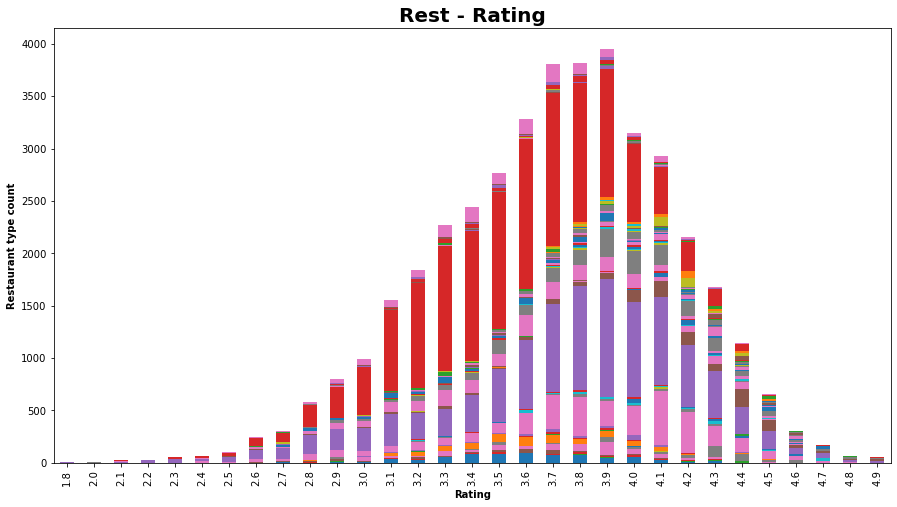

In [90]:
loc = pd.crosstab(df['rate'],df['rest_type'])
loc.plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.xlabel('Rating',fontsize = 10, fontweight = 'bold')
plt.ylabel('Restaurant type count',fontsize = 10, fontweight = 'bold')
plt.title('Rest - Rating', fontsize = 20, fontweight = 'bold')
plt.xticks()
plt.yticks()
plt.legend().remove()

### Types of services

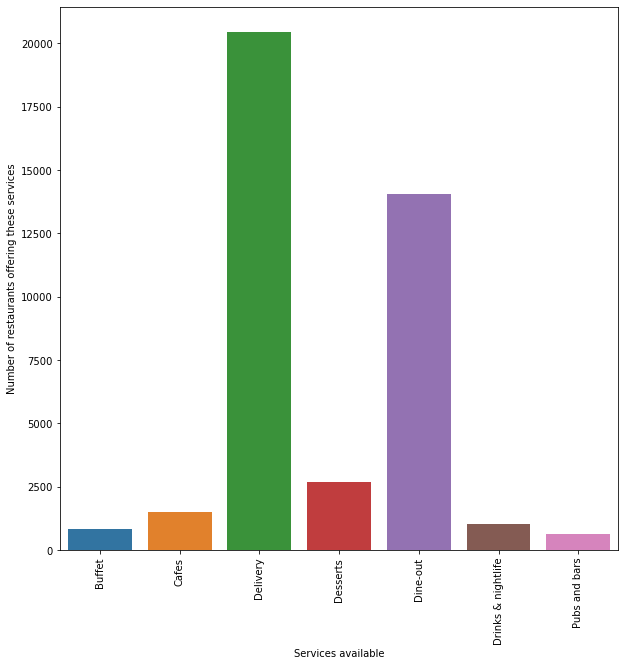

In [89]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(),rotation = 90)
plt.xlabel('Services available')
plt.ylabel('Number of restaurants offering these services')
fig = plt.gcf()
fig.set_size_inches(10,10)

In [58]:
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Type and rating

Text(0.5, 1.0, 'Relation between type of restaurant and rating')

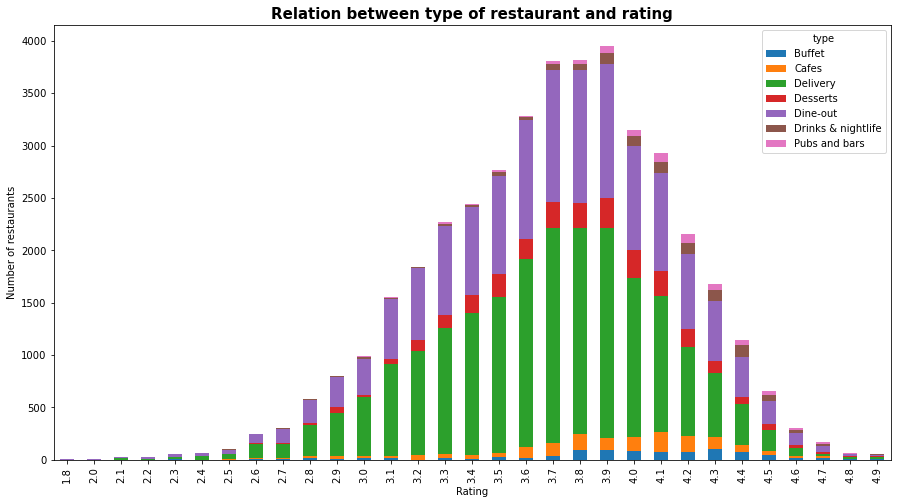

In [88]:
type_rate = pd.crosstab(df['rate'], df['type'])
type_rate.plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.xticks()
plt.yticks()
plt.xlabel('Rating')
plt.ylabel('Number of restaurants')
plt.title('Relation between type of restaurant and rating', fontweight = 'bold', fontsize = 15)

### Cost of restaurant

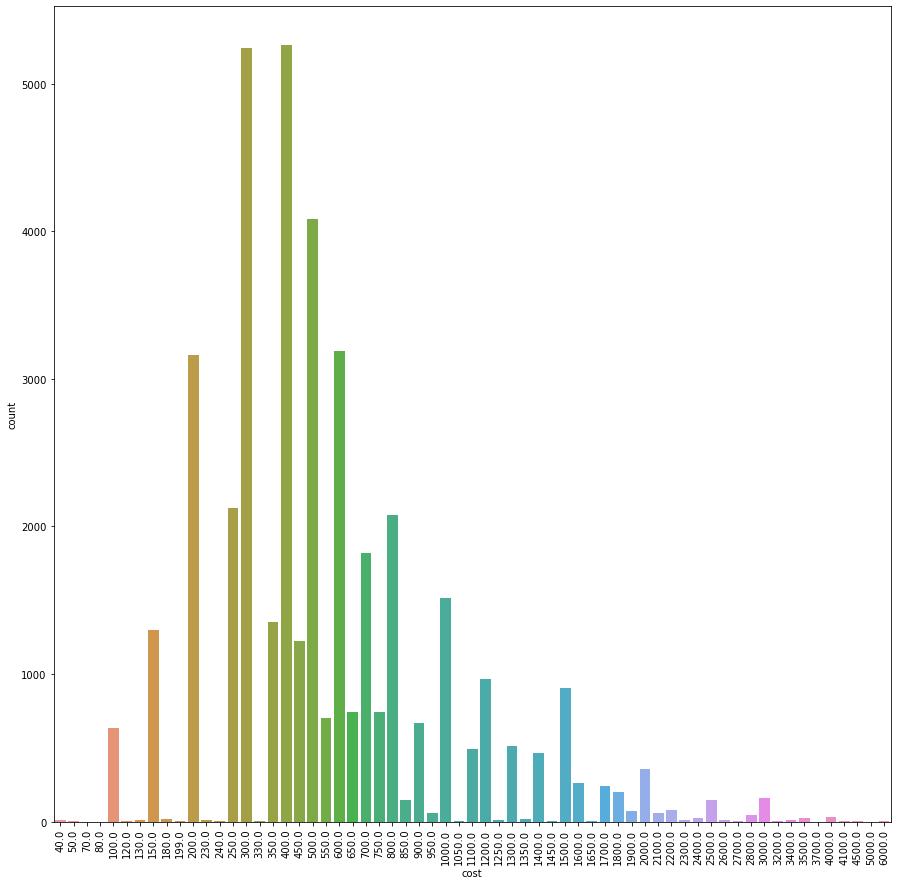

In [77]:
sns.countplot(df['cost'])
sns.countplot(df['cost']).set_xticklabels(sns.countplot(df['cost']).get_xticklabels(), rotation = 90)
fig = plt.gcf()
fig.set_size_inches(15,15)

###  No. of restraurants in a location

Text(0, 0.5, 'Number of restaurants')

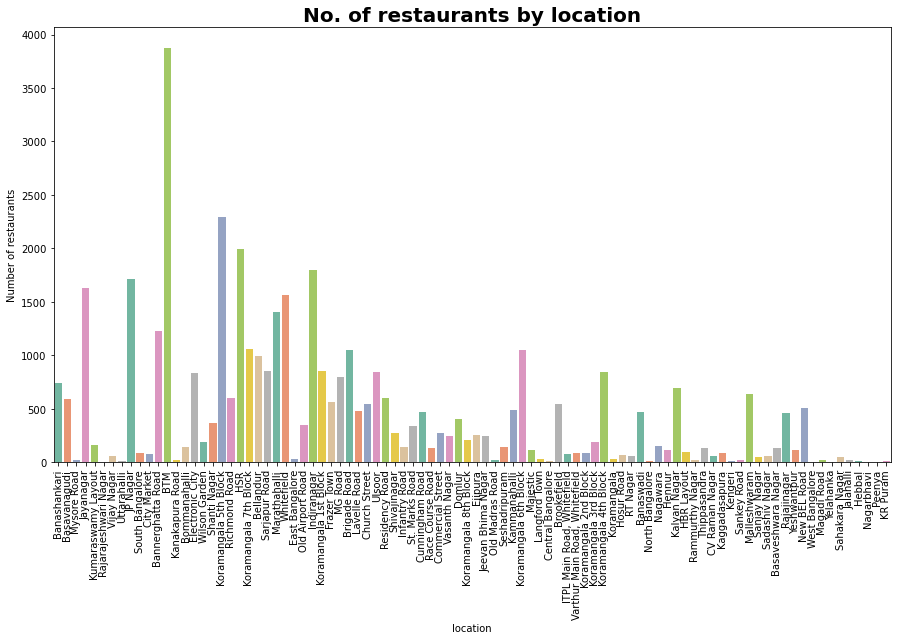

In [87]:
plt.figure(figsize = (15,8))
loc = sns.countplot(x = 'location', data = df, palette = "Set2")
loc.set_xticklabels(loc.get_xticklabels(), rotation = 90)
plt.title('No. of restaurants by location', fontsize = 20, fontweight = 'bold')
plt.xlabel('location')
plt.ylabel('Number of restaurants')

### Restaurant type

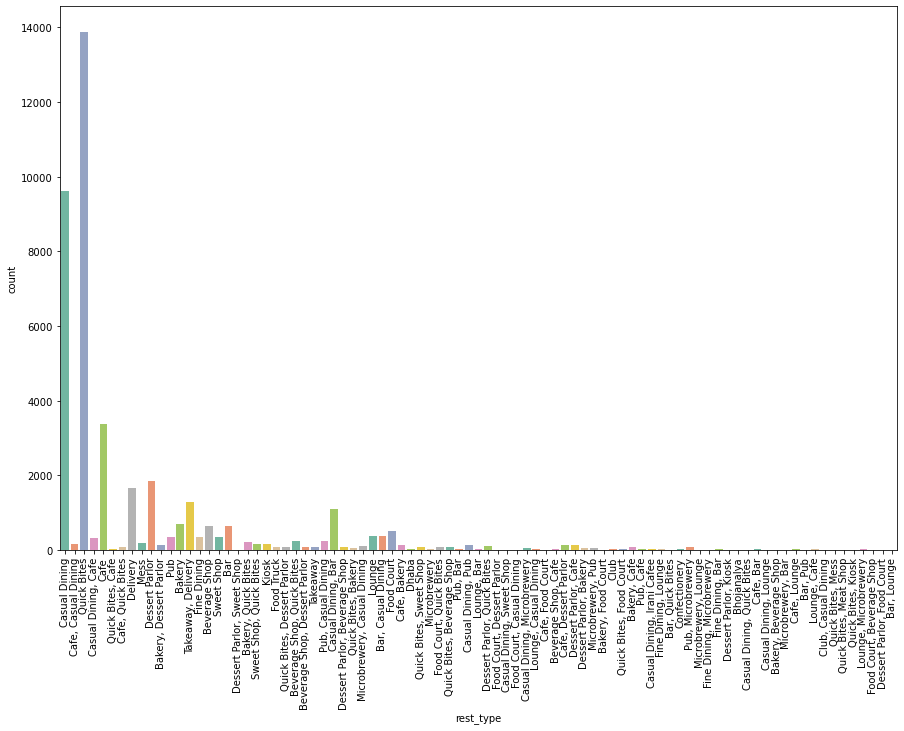

In [108]:
rest = sns.countplot(df['rest_type'], palette = "Set2")
rest.set_xticklabels(rest.get_xticklabels(),rotation = 90)
fig = plt.gcf()
fig.set_size_inches(15,10)

### Most famous restraurant chains in bangalore

Text(0, 0.5, 'Restaurant name')

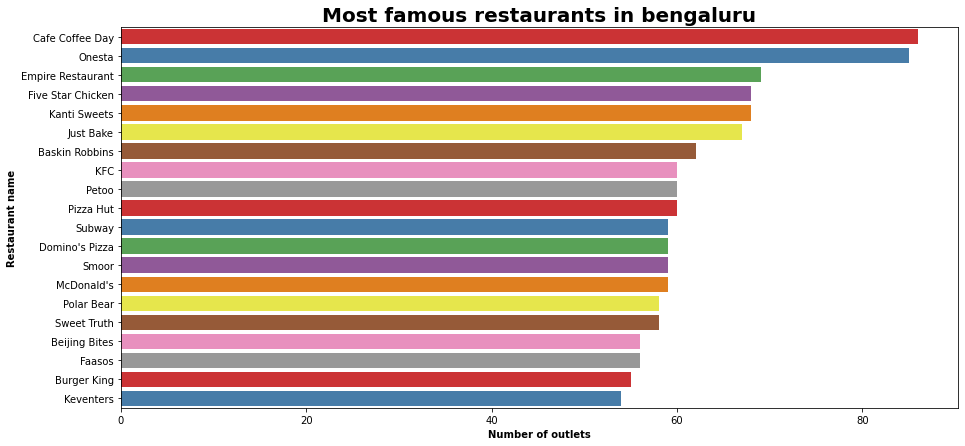

In [129]:
plt.figure(figsize = (15,7))
chains = df['name'].value_counts()[:20]
sns.barplot(x = chains, y = chains.index, palette = "Set1")
plt.title('Most famous restaurants in bengaluru', fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of outlets', fontweight = 'bold')
plt.ylabel('Restaurant name', fontweight = 'bold')

## Linear Regression

In [131]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2843949462002363

### Decision Tree Regression 

In [133]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.845378226580258

### Random Forest Regression

In [138]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8764478847798591

### Extra tree regressor

In [139]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9385946205900975

In [140]:
import pickle
# Saving model to disk
pickle.dump(ETree, open('model.pkl','wb'))